In [ ]:
import numpy as sri
import matplotlib.pyplot as plt 
import csv

'''--------------------------Reading the train data---------------------------------'''

filename = '/content/svm_train_dataset.txt'
no_of_records = 0 ;
with open(filename,'r') as f:
    reader = csv.reader(f,delimiter=' ')
    for row in reader:
        no_of_records = no_of_records+1;

x = sri.zeros((no_of_records,8))
y = sri.zeros((no_of_records,1))

data_row_num = 0
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        for col_idx, value in enumerate(row):
            if col_idx == 0:
                y[data_row_num][0] = int(value)
            else:
                x[data_row_num][col_idx-1] = float(value[2:])
        data_row_num += 1



In [ ]:

'''--------------------------Reading the test data---------------------------------'''

test_data = '/content/svm_test_dataset.txt'
no_of_records_test = 0 ;
with open(test_data,'r') as f:
    reader = csv.reader(f,delimiter=' ')
    for row in reader:
        no_of_records_test = no_of_records_test + 1;

X_test = sri.zeros((no_of_records_test,8))
y_test = sri.zeros((no_of_records_test,1))

row_num_test = 0
with open(test_data, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        for strings in range(len(row)):
            if strings == 0:
                y_test[row_num_test][0] = int(row[strings])
            else:
                col_idx = int(row[strings][0]) - 1  # Convert first character to index
                temp_string = row[strings][2:]
                temp_float = float(temp_string)
                X_test[row_num_test][col_idx] = temp_float
        row_num_test += 1


'''-------Splitting the dataset into the Training set and Validation set---------'''

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.50, random_state = 0)
y_train = y_train.ravel()
y_test = y_test.ravel()
y_valid = y_valid.ravel()

'''-------------------------Feature Scaling---------------------------------'''

from sklearn.preprocessing import StandardScaler
feature_scaling = StandardScaler()
X_train = feature_scaling.fit_transform(X_train)
X_valid = feature_scaling.transform(X_valid)

(2000, 2)


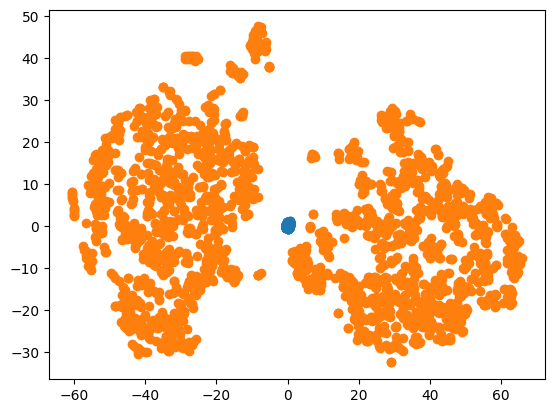

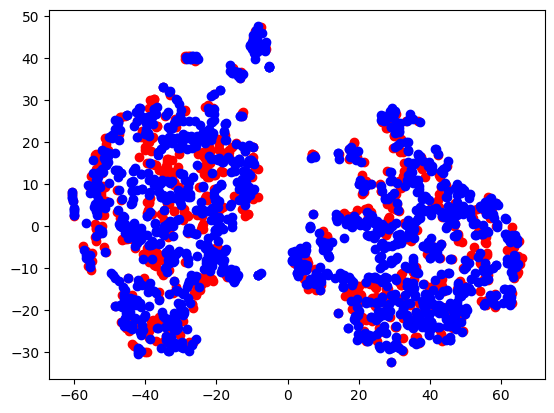

In [ ]:
'''--------------------------Visualizing the data(PCA) ----------------------'''
 
from sklearn.decomposition import PCA
principle_components = 2 

pca_algo = PCA(principle_components)
pca_algo_results = pca_algo.fit_transform(x)
plt.scatter(pca_algo_results[:,0],pca_algo_results[:,1])

'''---------------------Visualizing the data(t-SNE)---------------------------'''       
            
from sklearn.manifold import TSNE
principle_components = 2 

x_tsne_transform = TSNE(principle_components).fit_transform(x)
print(x_tsne_transform .shape)
plt.scatter(x_tsne_transform[:,0],x_tsne_transform[:,1])
plt.show()

# #projection class wise 
import numpy as np
import matplotlib.pyplot as plt

# Initialize two empty arrays with 0 rows and a certain number of columns
principle_components = 2
positive_data = np.zeros((0, principle_components))
negative_data = np.zeros((0, principle_components))

# Assume that there is a 2D data array `data` and a binary label array `labels`
for i in range(y.shape[0]):
    # If the label is positive (i.e., 1), append the corresponding row to `positive_data`
    if y[i] == 1:
        positive_data = np.append(positive_data, x_tsne_transform[i, :])
    # If the label is negative (i.e., 0), append the corresponding row to `negative_data`
    else:
        negative_data = np.append(negative_data, x_tsne_transform[i, :])

# Reshape the arrays to have the appropriate number of rows and columns
positive_data = positive_data.reshape(-1, principle_components)
negative_data = negative_data.reshape(-1, principle_components)

# Create a scatter plot with the two sets of data points
plt.scatter(positive_data[:, 0], positive_data[:, 1], color='red')
plt.scatter(negative_data[:, 0], negative_data[:, 1], color='blue')
plt.show()


In [ ]:

'''------------Fitting SVM to the Training set(TRAINING)--------------------'''
from sklearn.svm import SVC

svm_linear_classifier = SVC(C = 0.001,kernel = 'linear', random_state = 0)
svm_linear_classifier.fit(X_train, y_train)
print(svm_linear_classifier.coef_)
print(svm_linear_classifier.intercept_)

[[ 0.15333147 -0.07091222  0.02531951  0.01828207 -0.00305996  0.02894688
   0.01917286  0.00191869]]
[-0.96168028]


In [ ]:
'''------------Predicting the Test set results(TESTING)---------------------'''

y_valid_prediction = svm_linear_classifier.predict(X_valid)

'''---------Performance(Confusion Matrix and Efficiency)--------------------'''

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_valid, y_valid_prediction)
print(conf_matrix)

Accuracy_of_linear_classifier = (conf_matrix[0,0]+conf_matrix[1,1])/(y_valid.size)
print (Accuracy_of_linear_classifier)

[[681   0]
 [319   0]]
0.681


Maximum Accuracy :  0.9325 Optimal Value of C is :  10
Accuracy array:
[[67.75]
 [67.75]
 [67.75]
 [88.75]
 [93.25]
 [93.25]]


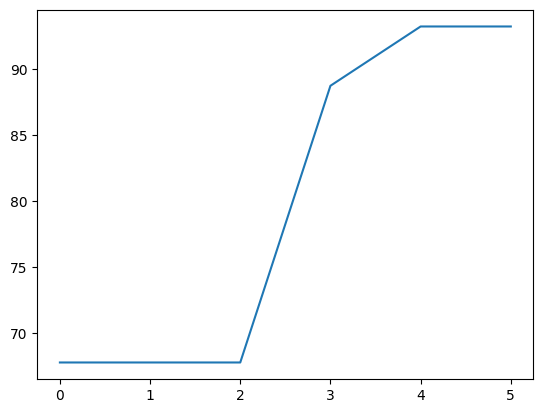

Corresponding Optimal Coefficients and Intercept
[[42.62255715 -4.240323    4.54597997  2.64347022  0.48345448  5.63709817
   3.0556774   2.29229434]]
[-40.77879085]


In [ ]:

'''------------Running in a loop(TRAIN -> Fit -> Accuracy) -------------------------'''
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

i,maximum_accuracy,optimal_C,optimal_gamma = (0,)*4
C_2d_range = [1e-3,1e-2,1e-1,1,10,1e2]
accuracy_array = sri.zeros((len(C_2d_range),1))
c_values_array = sri.zeros((len(C_2d_range),1))
    
for C in C_2d_range:
    linear_classifier = SVC(C = C,kernel = 'linear', random_state = 0)
    linear_classifier.fit(X_train, y_train)
    y_pred_valid = linear_classifier.predict(X_valid)
    conf_matrix = confusion_matrix(y_valid, y_pred_valid)
    Accuracy1 = (conf_matrix[0,0]+conf_matrix[1,1])/(y_valid.size)
    accuracy_array[i,0]= Accuracy1*100
    c_values_array[i,0] = C
    if Accuracy1 > maximum_accuracy:
        maximum_accuracy = Accuracy1
        optimal_C = C
    i = i+1
    
print("Maximum Accuracy : ",maximum_accuracy,"Optimal Value of C is : ",optimal_C)    
print('Accuracy array:')
print(accuracy_array)
plt.plot(accuracy_array)
plt.show()

linear_classifier = SVC(C = optimal_C,kernel = 'linear', random_state = 0)
linear_classifier.fit(X_train, y_train)
print('Corresponding Optimal Coefficients and Intercept')
print(linear_classifier.coef_)
print(linear_classifier.intercept_)

 

In [ ]:
from svmutil import *
# import numpy as np
# from numpy import ctypeslib

# Set the parameters for the SVM classifier
param = svm_parameter('-s 0 -t 2 -g 0.1 -c 1')

# Split the data into 5 subsets of equal size for cross validation
subset_size = len(X_valid) // 5
subset_indices = [(i * subset_size, (i + 1) * subset_size) for i in range(5)]

# Initialize an array to hold the accuracies for each fold
accuracies = []

# Loop over each fold
for subset_index in subset_indices:
    # Split the data into training and testing sets for this fold
    train_indices = list(set(range(len(X_valid))) - set(range(subset_index[0], subset_index[1])))
    X_train, y_train = X_valid[train_indices], y_valid[train_indices]
    X_test, y_test = X_valid[subset_index[0]:subset_index[1]], y_valid[subset_index[0]:subset_index[1]]
    
    # Train the SVM classifier on the training set
    prob = svm_problem(y_train, X_train)
    model = svm_train(prob, param)
    
    # Use the trained classifier to predict labels for the testing set
    p_label, p_acc, p_val = svm_predict(y_test, X_test, model)
    
    # Calculate the accuracy of the classifier on this fold
    fold_accuracy = p_acc[0]
    
    # Add the accuracy to the list of accuracies
    accuracies.append(fold_accuracy)

# Calculate the average accuracy over all folds
avg_accuracy = np.mean(accuracies)

# Print the cross validation accuracy
print("Cross Validation Accuracy: ", avg_accuracy)

Set Avg Acc =  67.8
Set Avg Acc =  67.8
Set Avg Acc =  93.65
Set Avg Acc =  91.90000000000002
Set Avg Acc =  82.30000000000001
Set Avg Acc =  67.8
Set Avg Acc =  94.10000000000001
Set Avg Acc =  94.55
Set Avg Acc =  92.05
Set Avg Acc =  83.7
Set Avg Acc =  90.85000000000001
Set Avg Acc =  94.60000000000001
Set Avg Acc =  94.75
Set Avg Acc =  91.95
Set Avg Acc =  83.80000000000001
Set Avg Acc =  93.99999999999999
Set Avg Acc =  94.65
Set Avg Acc =  94.40000000000002
Set Avg Acc =  91.35
Set Avg Acc =  83.94999999999999
Set Avg Acc =  94.19999999999999
Set Avg Acc =  94.69999999999999
Set Avg Acc =  94.35
Set Avg Acc =  91.05000000000001
Set Avg Acc =  84.00000000000001
Maximum Accuracy :  94.75
Optimal Value of C is :  50
Optimal Value of Gamma :  1
Optimal Value of Sigma :  0.7071067811865476
Accuracy Matrix: [[67.8  67.8  93.65 91.9  82.3 ]
 [67.8  94.1  94.55 92.05 83.7 ]
 [90.85 94.6  94.75 91.95 83.8 ]
 [94.   94.65 94.4  91.35 83.95]
 [94.2  94.7  94.35 91.05 84.  ]]


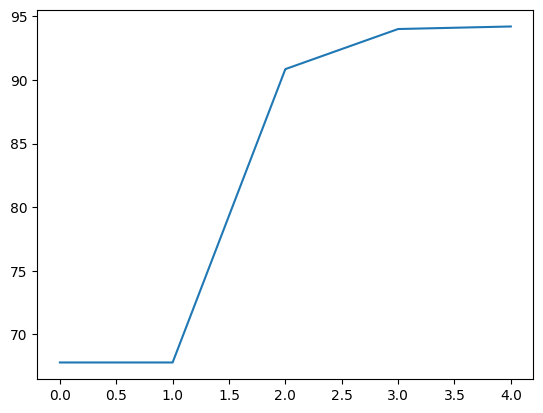

In [ ]:
'''--------------Same Visualization with RBF Kernal-------------------------'''

C_values_RBF = [1,10,50,100,150]
gamma_range_RBF = [1e-2,1e-1, 1, 1e1,1e+2]

m1 = len(C_values_RBF)
from sklearn.model_selection import KFold

accuracy_matrix = sri.zeros((m1,m1))
i,j,max_accuracy,opt_gamma = (0,)*4

for C in C_values_RBF:
    j = 0
    for gamma in gamma_range_RBF:
        Average_Accuracy = 0
        RBF_kf = KFold(5, random_state=None, shuffle=False)
        for index1, index2 in RBF_kf.split(x):
            
            X_train, X_valid = x[index1], x[index2]
            y_train, y_valid = y[index1], y[index2]
            y_train = y_train.ravel()
            y_valid = y_valid.ravel() 
        
            classifier_RBF = SVC(C = C,gamma = gamma,kernel = 'rbf', random_state = 0)
            classifier_RBF.fit(X_train, y_train)
            
            y_pred_valid_RBF = classifier_RBF.predict(X_valid)
            
            cm = confusion_matrix(y_valid, y_pred_valid_RBF)
            
            Accuracy_RBF = (cm[0,0]+cm[1,1])/(y_valid.size)
            
            Average_Accuracy = Average_Accuracy + Accuracy_RBF
            
        Average_Accuracy = Average_Accuracy/5       
        print("Set Avg Acc = ",Average_Accuracy*100)
        accuracy_matrix[i][j] = (Average_Accuracy)*100
        if Average_Accuracy*100 > max_accuracy:
            max_accuracy = accuracy_matrix[i][j]
            opt_C = C
            opt_gamma = gamma
        j = j+1
    i = i+1

print("Maximum Accuracy : ",max_accuracy)    
print("Optimal Value of C is : ",opt_C)
print("Optimal Value of Gamma : ",opt_gamma)
print("Optimal Value of Sigma : ",sri.sqrt(sri.divide(1,2*opt_gamma)))

print('Accuracy Matrix:', accuracy_matrix)
plt.plot(accuracy_matrix[:,0])
plt.show()


In [ ]:

classifier_test_RBF = SVC(C = opt_C,gamma = opt_gamma,kernel = 'rbf', random_state = 0)
y = y.ravel()
classifier_test_RBF.fit(x, y)
print('Corresponding Optimal Intercept : ',classifier_test_RBF.intercept_)
y_pred_test = classifier_test_RBF.predict(X_test)
print('Predicted values',y_pred_test)

Corresponding Optimal Intercept :  [1.37997926]
Predicted values [ 1. -1. -1. ... -1. -1.  1.]


In [ ]:
#### Results in a file ####

row_num_test = 0 ;
f = open(test_data)
f1 = open('RNA_test_output.txt', 'w+')

for line in f.readlines():
    text = str(int(y_pred_test[row_num_test])) + line[1:]
    f1.write(text)
    row_num_test = row_num_test +1
    
f.close()
f1.close()